<h1>Heart Disease Prediction using Linear Regression</h1>

<i><h3>Importing Essential Libraries</h3></i>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<i><h3>Exploratory Data Analysis</h3></i>

In [3]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,cholesterol,blood_pressure,smoking_status,risk_score
0,68,208,116,0,28.431944
1,58,267,91,1,31.838894
2,44,309,179,0,39.227388
3,72,245,106,1,29.563271
4,37,329,122,0,34.054611


In [4]:
print(df.to_string())

     age  cholesterol  blood_pressure  smoking_status  risk_score
0     68          208             116               0   28.431944
1     58          267              91               1   31.838894
2     44          309             179               0   39.227388
3     72          245             106               1   29.563271
4     37          329             122               0   34.054611
5     50          262              98               0   27.467932
6     68          211             132               0   31.928176
7     48          335             137               1   41.643615
8     52          201             128               0   15.788677
9     40          161             131               1   25.643531
10    40          188             115               0   24.356857
11    53          279             139               0   32.872575
12    65          280             114               1   38.196947
13    69          262             113               0   32.811741
14    53  

In [5]:
df.tail(10)

,age,cholesterol,blood_pressure,smoking_status,risk_score
190,68,253,138,1,42.712054
191,35,323,101,0,30.228102
192,37,173,150,1,27.925920
193,56,263,108,0,30.984706
194,38,181,165,0,30.175972
195,66,324,98,0,35.444683
196,62,235,160,1,34.575966
197,71,300,117,1,36.798136
198,73,343,167,1,48.696891
199,53,276,141,1,44.436635


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             200 non-null    int64  
 1   cholesterol     200 non-null    int64  
 2   blood_pressure  200 non-null    int64  
 3   smoking_status  200 non-null    int64  
 4   risk_score      200 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [7]:
df.shape

(200, 5)

In [8]:
df.describe()

,age,cholesterol,blood_pressure,smoking_status,risk_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,54.260000,258.720000,133.015000,0.480000,33.855092
std,14.229716,56.466307,26.207996,0.500854,7.146596
min,30.000000,151.000000,90.000000,0.000000,15.788677
25%,42.000000,207.750000,109.750000,0.000000,29.434963
50%,55.000000,264.500000,132.500000,0.000000,33.157157
75%,67.250000,307.000000,152.250000,1.000000,39.257175
max,79.000000,349.000000,179.000000,1.000000,52.318937


In [9]:
df.columns

Index(['age', 'cholesterol', 'blood_pressure', 'smoking_status', 'risk_score'], dtype='object')

In [10]:
df.count()

age               200
cholesterol       200
blood_pressure    200
smoking_status    200
risk_score        200
dtype: int64

In [11]:
df.isnull().sum()

age               0
cholesterol       0
blood_pressure    0
smoking_status    0
risk_score        0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [13]:
df.cov

<bound method DataFrame.cov of      age  cholesterol  blood_pressure  smoking_status  risk_score
0     68          208             116               0   28.431944
1     58          267              91               1   31.838894
2     44          309             179               0   39.227388
3     72          245             106               1   29.563271
4     37          329             122               0   34.054611
..   ...          ...             ...             ...         ...
195   66          324              98               0   35.444683
196   62          235             160               1   34.575966
197   71          300             117               1   36.798136
198   73          343             167               1   48.696891
199   53          276             141               1   44.436635

[200 rows x 5 columns]>

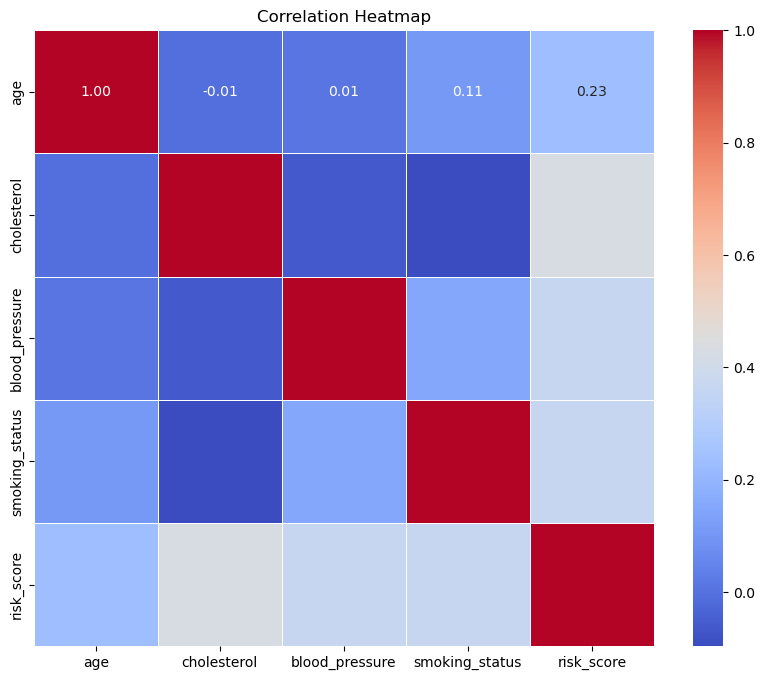

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

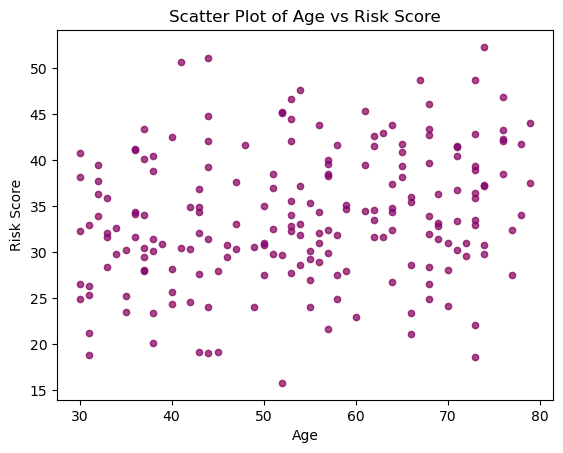

In [17]:
x = df.iloc[:,:1]
y = df.iloc[:,-1]
plt.scatter(x, y, s=20, c="brown", label='Age Points', alpha=0.5)
plt.scatter(x, y, s=20, c="purple", label='Risk Points', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Risk Score')
plt.title('Scatter Plot of Age vs Risk Score')
plt.show()

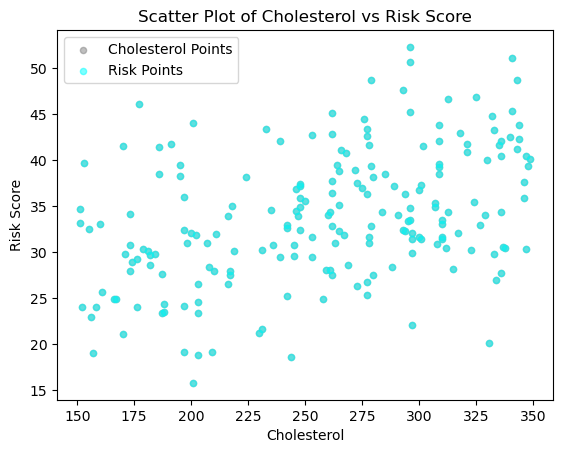

In [59]:
x = df.iloc[:,1:2]
y = df.iloc[:,-1]
plt.scatter(x, y, s=20, c="grey", label='Cholesterol Points', alpha=0.5)
plt.scatter(x, y, s=20, c="cyan", label='Risk Points', alpha=0.5)
plt.xlabel('Cholesterol')
plt.ylabel('Risk Score')
plt.title('Scatter Plot of Cholesterol vs Risk Score')
plt.legend()
plt.show()

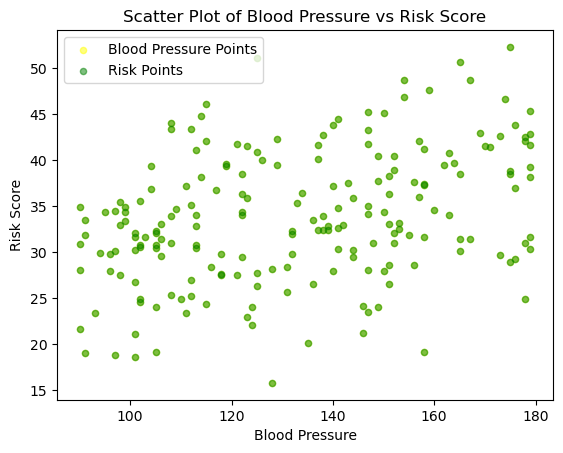

In [16]:
x = df.iloc[:,2:3]
y = df.iloc[:,-1]
plt.scatter(x, y, s=20, c="yellow", label='Blood Pressure Points', alpha=0.5)
plt.scatter(x, y, s=20, c="green", label='Risk Points', alpha=0.5)
plt.xlabel('Blood Pressure')
plt.ylabel('Risk Score')
plt.title('Scatter Plot of Blood Pressure vs Risk Score')
plt.legend()
plt.show()

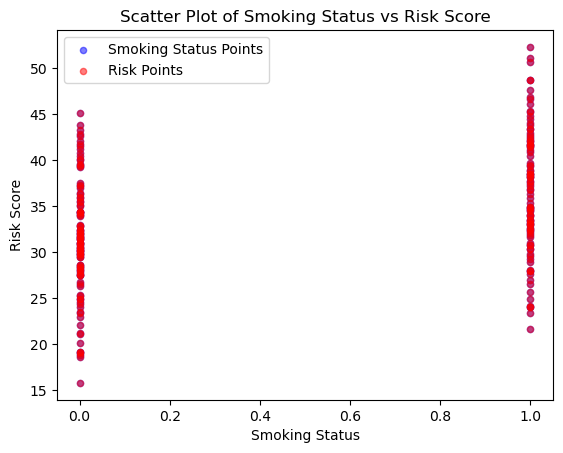

In [18]:
x = df.iloc[:,3:4]
y = df.iloc[:,-1]
plt.scatter(x, y, s=20, c="blue", label='Smoking Status Points', alpha=0.5)
plt.scatter(x, y, s=20, c="red", label='Risk Points', alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Risk Score')
plt.title('Scatter Plot of Smoking Status vs Risk Score')
plt.legend()
plt.show()

In [9]:
X = df.iloc[:,:4]
print(X)

     age  cholesterol  blood_pressure  smoking_status
0     68          208             116               0
1     58          267              91               1
2     44          309             179               0
3     72          245             106               1
4     37          329             122               0
..   ...          ...             ...             ...
195   66          324              98               0
196   62          235             160               1
197   71          300             117               1
198   73          343             167               1
199   53          276             141               1

[200 rows x 4 columns]


In [10]:
Y = df.iloc[:,-1]
print(Y)

0      28.431944
1      31.838894
2      39.227388
3      29.563271
4      34.054611
         ...    
195    35.444683
196    34.575966
197    36.798136
198    48.696891
199    44.436635
Name: risk_score, Length: 200, dtype: float64


<i><h3>Model Training</h3></i>

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 9456)

In [12]:
print(X_train)

     age  cholesterol  blood_pressure  smoking_status
74    39          308              90               0
116   57          231              90               1
99    36          310             158               0
102   30          224             179               1
32    57          309             175               1
..   ...          ...             ...             ...
101   53          265             105               1
179   59          265             112               0
147   44          176             124               0
113   71          295              99               1
195   66          324              98               0

[160 rows x 4 columns]


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
ypred = lr.predict(X_test)

<i><h3>Adding Predicted values as a new column in the dataset</h3></i>

In [18]:
df['Predicted value'] = lr.predict(X);
print(df.to_string())

     age  cholesterol  blood_pressure  smoking_status  risk_score  Predicted value
0     68          208             116               0   28.431944        28.261149
1     58          267              91               1   31.838894        33.782843
2     44          309             179               0   39.227388        37.203125
3     72          245             106               1   29.563271        35.095752
4     37          329             122               0   34.054611        32.825966
5     50          262              98               0   27.467932        28.148057
6     68          211             132               0   31.928176        29.800448
7     48          335             137               1   41.643615        40.674272
8     52          201             128               0   15.788677        27.421882
9     40          161             131               1   25.643531        29.514759
10    40          188             115               0   24.356857        24.469374
11  

<i><h3>Linear Regression Graph</h3></i>

Index(['age', 'cholesterol', 'blood_pressure', 'smoking_status', 'risk_score',
       'Predicted value'],
      dtype='object')


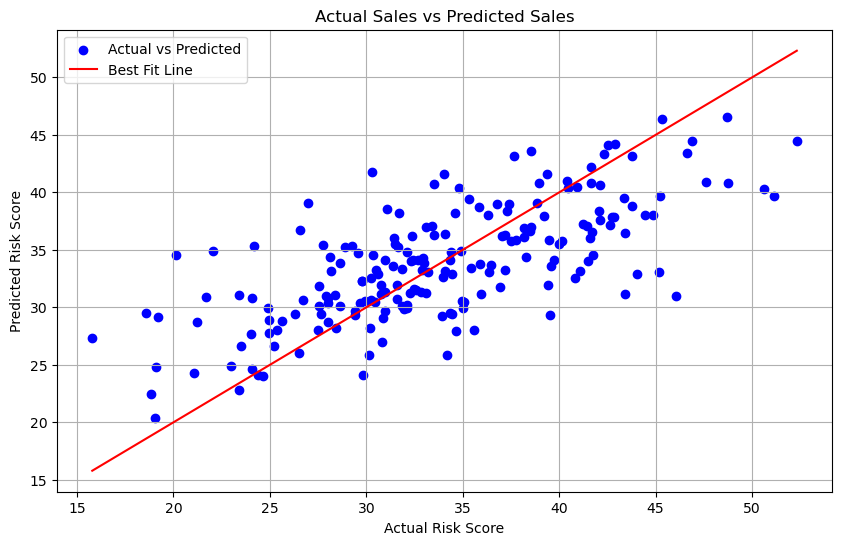

In [24]:
X = df[['age', 'cholesterol', 'blood_pressure','smoking_status']]
y = df['risk_score']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict on the entire dataset for plotting
predicted_risk = model.predict(X)
df['Predicted value'] = predicted_risk

# Verify the columns
print(df.columns)

# Create scatter plot for actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(df['risk_score'], df['Predicted value'], color='blue', label='Actual vs Predicted')
plt.plot([df['risk_score'].min(), df['risk_score'].max()], [df['risk_score'].min(), df['risk_score'].max()], color='red', label='Best Fit Line')
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Actual Risk Score')
plt.ylabel('Predicted Risk Score')
plt.legend()
plt.grid(True)
plt.show()


<i><h3>Linear Regression Model Accuracy</h3></i>

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ypred)
print(score*100)

79.91291954809479


In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,ypred)
print(mse)

10.541981353460221
